In [1]:
# Sentiment Analys
# Doing the sentiment analysis 

By Analyze the posts of social media to determine the sentiments of the people (Positive, Negative, Neutral). By using the technique of NLP (Natural Language Processing) to prprocess the text and train the model. Visualizing the sentiments by using the topic.

**Introduction**

This project dives into sentiment analysis, we'll use the social media posts to figure out if people are generally feeling postitive, negative , or neutral. 

**Steps:**
1. Cleaning the data
2. Building the model
3. Improve the model

we'll use different techniques and visualizations to understand sentiment trends and hopefully build a tool that can automatically analyze public opinion.

In [2]:
# Project Steps that we have to take first:
# 1. Define the problem: Understand the type of problem(classification, regression, etc.)
# 2. Collect and Prepare Data: Obtain the dataset, handle missing values, and preprocess data.
# 3. Exporatory Data Analysisi (EDS): Visualize data to understand patterns and correlations.
# 4. Feature Engineering: Select and create relevant features.
# 5. Split the Data: Divide the dataset into training and testing sets.
# 6. Choose a model: Select a suitable machine learning algorithm
# 7. Train the Model: Train the model using the training set.
# 8. Evaluate the Model: Use appropriate metrics to evalueate the model on the test set.
# 9. Improve the Model: Tune hyperparameters, try differenct algorithms, or enhance featrues
# 10. Deploy the Model (optional): Create an application or API to make predictions using the trained model.

**1. Define the Problem**

The problem is to classify the sentiment of social media posts into three categories: positive, negative, or neutral. This is a multi-class classification problem.

****Objective****
Figure out what you're trying to do. In this case, It's determining if social media posts are generally positive, negative, or neutral in tone.

*****Type:*****

Multi-class classification (Positive, Negative, Neutral)

In [3]:
# Load Important Libararies
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import datetime # Import the datetime module

import warnings 
warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Define a color palette
color_palette = sns.color_palette('plasma') 

sns.set_palette(color_palette)

In [5]:
# Collect and Prepare Data
# Load your dataset of social media posts

In [6]:
# Load the datasets
df = pd.read_csv("/kaggle/input/telegram-channels-related-to-cryptocurrencies/Comments on Telegram channels related to cryptocurrencies along with sentiments/telegram_channels_messages14021213_with_sentiment.csv")

In [7]:
df.head().style.background_gradient(cmap='plasma')

,Unnamed: 0,channel,id,text,date,views,scores,compound,sentiment_type
0,0,binancesignals,1382,bitcoin market cap surpasses 13 trillion,2024-03-04 15:33:04+00:00,6319.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,NEUTRAL
1,1,binancesignals,1381,update atausdt long leverage cross x10 smashed second target reached 600 profit using x10 leverage ð,2024-03-04 10:48:51+00:00,6847.000000,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.5106}",0.510600,POSITIVE
2,2,binancesignals,1380,altcoins started make move bitcoin total market cap hit 14month high altseason finally hereðð,2024-03-03 18:53:52+00:00,8066.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,NEUTRAL
3,3,binancesignals,1379,coin maticusdt timeframe 1d observation broken major horizontal level resistance went retest expecting see large movement upside one first target would 12,2024-03-03 16:52:07+00:00,7740.000000,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'compound': -0.4767}",-0.476700,NEGATIVE
4,4,binancesignals,1378,coin aptusdt timeframe 1d observation broken major horizontal level resistance went liquidity grab expecting see pullback upside 15,2024-03-03 16:50:49+00:00,7668.000000,"{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'compound': -0.4767}",-0.476700,NEGATIVE


In [8]:
df.describe().style.background_gradient(cmap='tab20c')

,Unnamed: 0,id,views,compound
count,14712.000000,14712.000000,14712.000000,14712.000000
mean,7695.078915,5731.983415,14737.631525,0.323880
std,4430.002318,3185.394956,12069.131738,0.468967
min,0.000000,7.000000,39.000000,-0.956500
25%,3825.750000,2620.500000,7513.750000,0.000000
50%,7702.500000,6559.000000,11528.000000,0.440400
75%,11527.250000,8412.000000,21654.250000,0.765000
max,15358.000000,10554.000000,375298.000000,0.995800


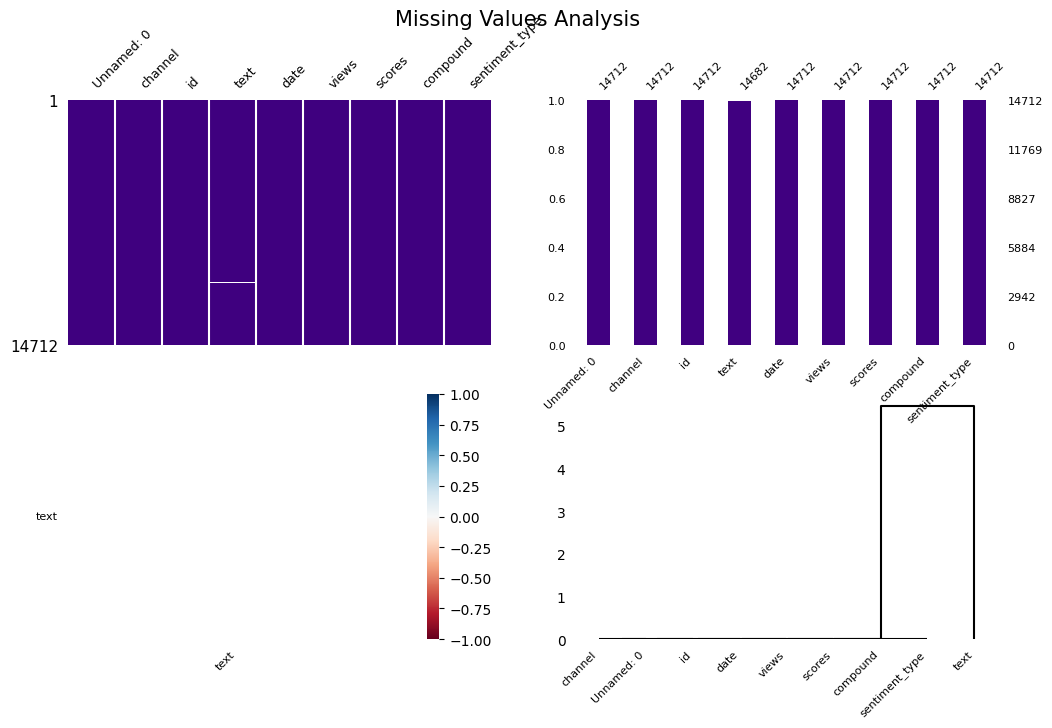

In [9]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

# Save the plot
plt.savefig('missing_values_analysis.png')

# Show the plot
plt.show()

In [10]:
# Data Cleaning and Preprocessing

****Clean the Text****:

1. Remove unnecessary stuff from the text, like website addresses, username, and special symbols.
2. Convert everything to lowercase to keep things consistent.
3. Deal with any missing posts, usually just filling them with empty text.

****Prepare the Text****:

1. Break the text into individual words.
2. Get rid of common words that don't help with sentiment (like 'the', 'a', 'is'). These are called 'stopwords'
3. Simplify words to their base from (e.g, 'running' becomes 'run'). This is called "lemmatization".

In [11]:
def clean_text(text):
    """
    Cleans the input text by removing special characters, URLs, and converting to lowercase.
    """
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'http\S+|www\S+|@\S+', '', text, flags=re.MULTILINE) # Remove URLs and mentions
        text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove special characters and numbers
        text = text.lower() # Convert to lowercase
        return text
    else:
        return ""  # Return an empty string for non-string values

df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text']].head())

def preprocess_text(text):
    """
    Tokenizes, removes stopwords, and lemmatizes the input text.
    """
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    # Join the words back into one string
    return ' '.join(words)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)
print(df[['cleaned_text', 'processed_text']].head())

                                                text  \
0           bitcoin market cap surpasses 13 trillion   
1  update atausdt long leverage cross x10 smashed...   
2  altcoins started make move bitcoin total marke...   
3  coin maticusdt timeframe 1d observation broken...   
4  coin aptusdt timeframe 1d observation broken m...   

                                        cleaned_text  
0           bitcoin market cap surpasses    trillion  
1  update atausdt long leverage cross x   smashed...  
2  altcoins started make move bitcoin total marke...  
3  coin maticusdt timeframe  d observation broken...  
4  coin aptusdt timeframe  d observation broken m...  
                                        cleaned_text  \
0           bitcoin market cap surpasses    trillion   
1  update atausdt long leverage cross x   smashed...   
2  altcoins started make move bitcoin total marke...   
3  coin maticusdt timeframe  d observation broken...   
4  coin aptusdt timeframe  d observation broken m... 

In [12]:
# Handling Missing Values
print("Missing Values before handling:")
df.isnull().sum()

Missing Values before handling:


Unnamed: 0         0
channel            0
id                 0
text              30
date               0
views              0
scores             0
compound           0
sentiment_type     0
cleaned_text       0
processed_text     0
dtype: int64

In [13]:
# Fill the missing text with an empty string
df['text'] = df['text'].fillna('')
print('\nMissing Values after handling:')
df.isnull().sum()


Missing Values after handling:


Unnamed: 0        0
channel           0
id                0
text              0
date              0
views             0
scores            0
compound          0
sentiment_type    0
cleaned_text      0
processed_text    0
dtype: int64

****3. Exploratory Data Analysis (EDA)****:

3.1 Sentiment Distribution:
Look at how many posts fall into each sentiment category(positive, negative, neutral). Visualize it with a bar chart


Sentiment Distribution:
 sentiment_type
POSITIVE    8789
NEUTRAL     3879
NEGATIVE    2044
Name: count, dtype: int64


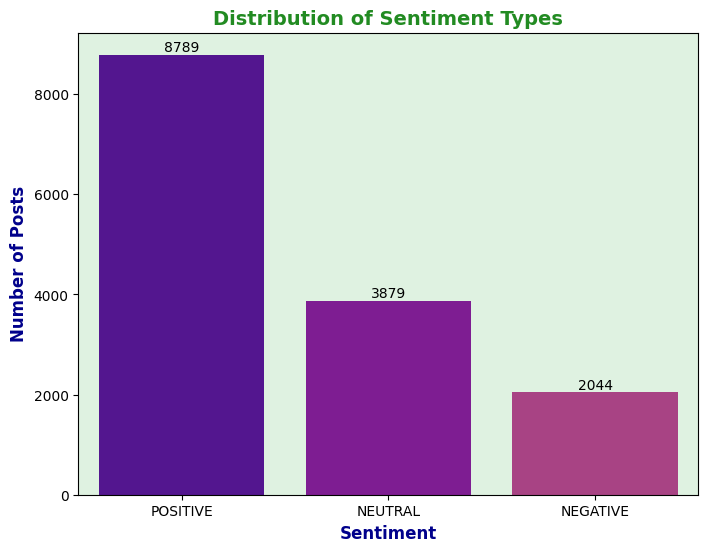

In [14]:
# Sentiment Distribution

sentiment_counts = df['sentiment_type'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)
plt.figure(figsize=(8,6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Distribution of Sentiment Types", fontsize=14, fontweight='bold', color='forestgreen')
plt.xlabel('Sentiment', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold', color='darkblue')
plt.gca().set_facecolor('#dff2e1')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.show()

****Most Common Words****:

Find the most frequent words in the posts to get a sense of the topics being discussed. Show it with a bar chart too.

Most Common Words: [('vip', 8531), ('market', 5609), ('binance', 5335), ('target', 5105), ('bitcoin', 4529), ('trading', 3812), ('killer', 3811), ('x', 3571), ('profit', 3527), ('level', 3410), ('update', 3284), ('btc', 3222), ('bullet', 3124), ('top', 2906), ('h', 2671), ('move', 2421), ('crypto', 2418), ('content', 2267), ('price', 2156), ('long', 2148)]


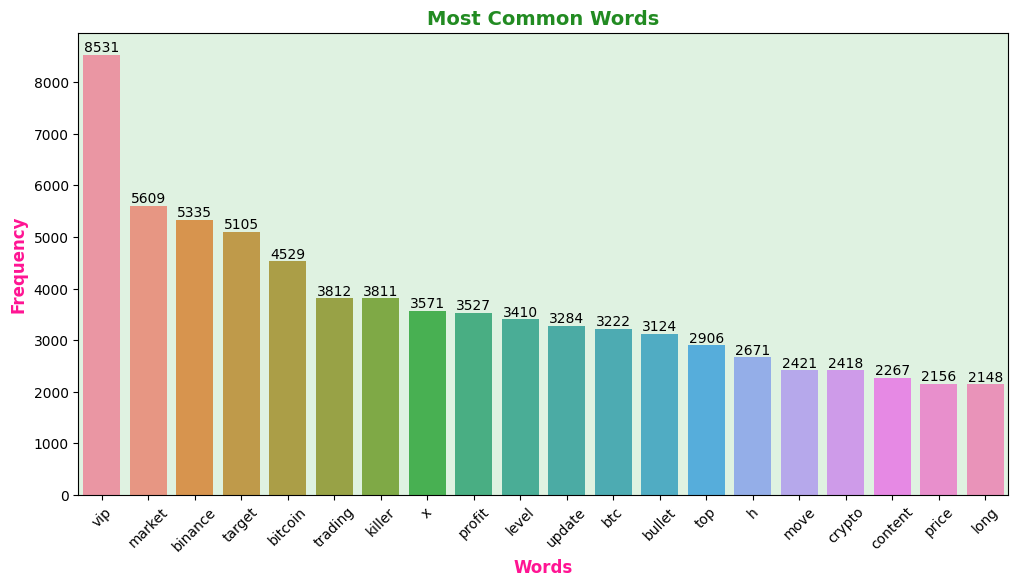

In [15]:
# Most Common Words
def plot_most_common_words(text_series, top_n=20):
    """
    Plots the most common words in a text series.
    """
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)
    print("Most Common Words:", most_common_words)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=list(words), y=list(counts))
    plt.xticks(rotation=45)
    plt.title('Most Common Words', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
    plt.xlabel('Words',fontsize = 12, fontweight = 'bold', color = 'deeppink')
    plt.ylabel('Frequency',fontsize = 12, fontweight = 'bold', color = 'deeppink')
    plt.gca().set_facecolor('#dff2e1')

    #Add values to the  most common words
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()

plot_most_common_words(df['processed_text'])

****3.3 Sentiment Distribution by Channel:****

1. Channel Sentiment: See how sentiment varies across different social media channels

In [16]:
# Sentiment Distribution by Channel


Sentiment Distribution by Channel:
 sentiment_type          NEGATIVE  NEUTRAL  POSITIVE
channel                                            
BitcoinBullets               285     1216      2291
CryptoScanner100eyes           0      249       344
VerifiedCryptoNews           149      222       450
binancekillers               427     1116      3732
binancesignals               704      642      1136
universalcryptosignals         4        0        13
wolfoftrading                475      434       823


<Figure size 1200x600 with 0 Axes>

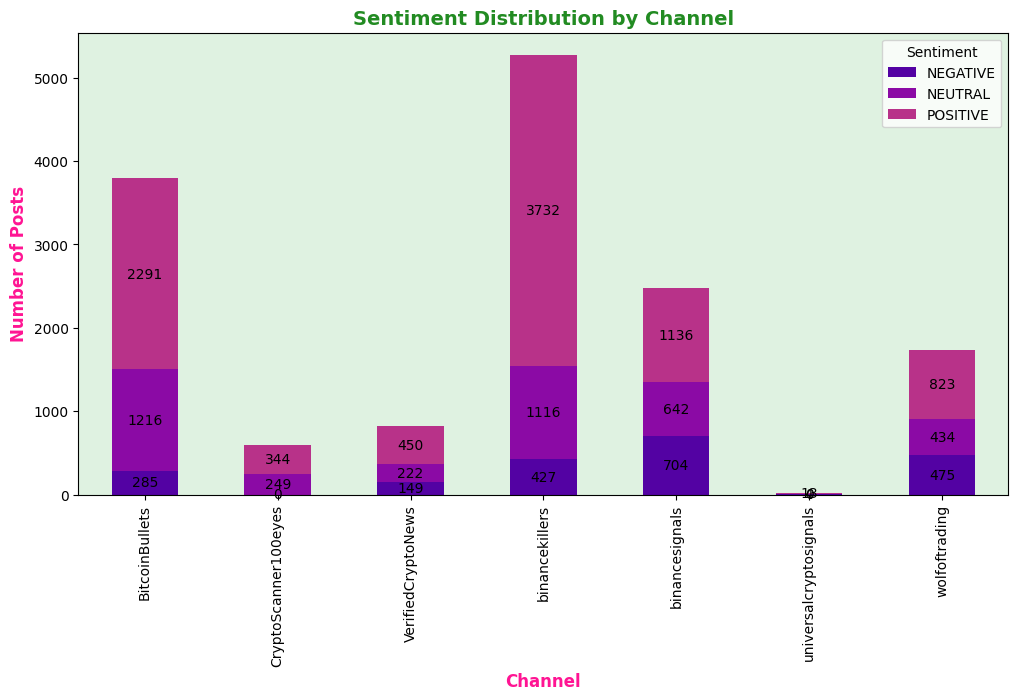

In [17]:
channel_sentiment = df.groupby('channel')['sentiment_type'].value_counts().unstack(fill_value=0)
print("Sentiment Distribution by Channel:\n", channel_sentiment)
plt.figure(figsize=(12, 6))
ax = channel_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment Distribution by Channel', fontsize=14, fontweight='bold', color='forestgreen')
plt.xlabel('Channel', fontsize=12, fontweight='bold', color='deeppink')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold', color='deeppink')
plt.legend(title='Sentiment')
plt.gca().set_facecolor('#dff2e1')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points', color='black')
plt.show()

****3.4 Sentiment Trends Over Time:****
1. Sentiment Trends: Observe how sentiment changes over time(e.g., Daily)

Daily Sentiment Counts:
 sentiment_type  NEGATIVE  NEUTRAL  POSITIVE
date                                       
2022-12-01             0        1         4
2022-12-02             1        2         7
2022-12-03             3        1        15
2022-12-04             3        5         7
2022-12-05             2        6         6


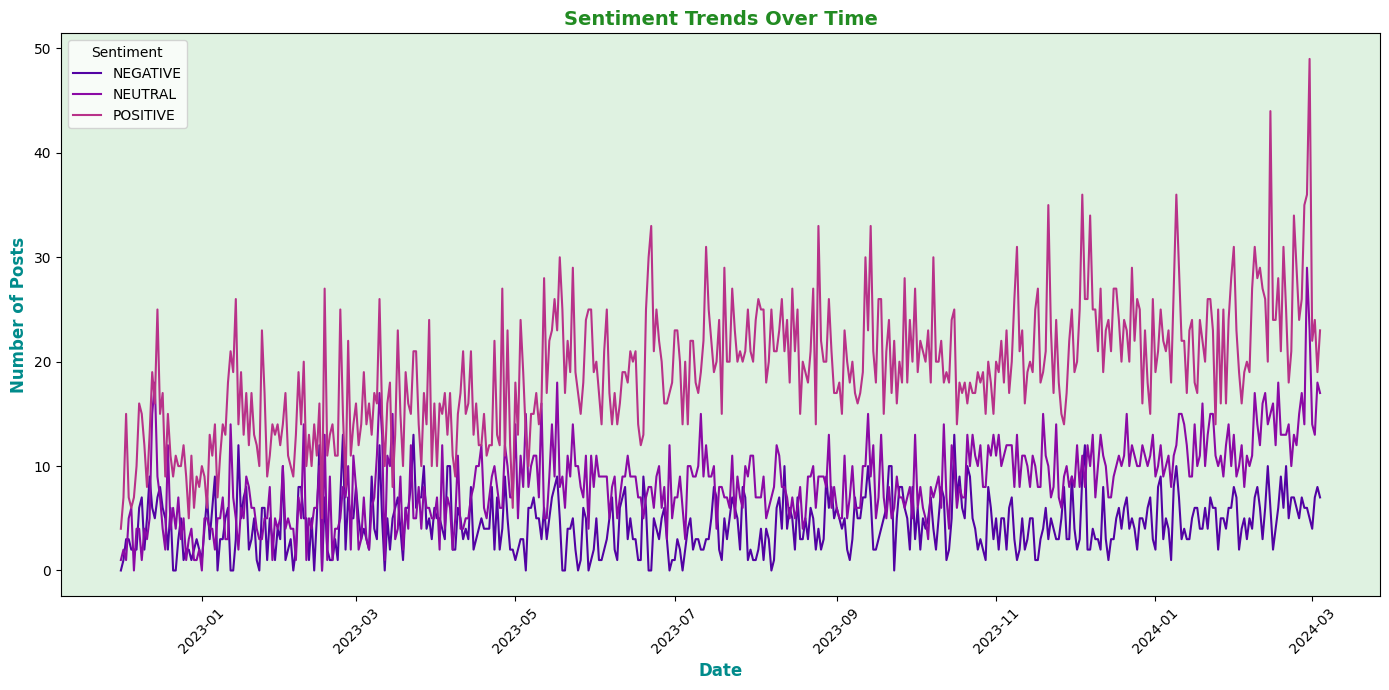

In [18]:
# Sentiment Trends Over Time
# Convert 'date' to datetime objects, handling potential parsing issues
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# If 'date' column has any NaT values (failed parsing), handle them
df = df.dropna(subset=['date'])

# Group by date and sentiment type
daily_sentiment = df.groupby([df['date'].dt.date, 'sentiment_type']).size().unstack(fill_value=0)
print("Daily Sentiment Counts:\n", daily_sentiment.head())
# Plot sentiment trends over time
daily_sentiment.plot(figsize=(14, 7))
plt.title('Sentiment Trends Over Time', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
plt.xlabel('Date',fontsize = 12, fontweight = 'bold', color = 'darkcyan')
plt.ylabel('Number of Posts',fontsize = 12, fontweight = 'bold', color = 'darkcyan')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.gca().set_facecolor('#dff2e1')
plt.show()

****3.5 Word Cloud Visualization:****

1. Word Cloud: Visually represent the most common words.

In [19]:
#  Word Cloud Visualization
def generate_word_cloud(text):
    """
    Generates and displays a word cloud from the given text.
    """
    # Check if the text list is empty
    if not text:
        print("No text available to generate word cloud.")
        return None  # Return None if no text

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Social Media Posts', fontsize = 14, fontweight = 'bold', color = 'forestgreen')
    plt.gca().set_facecolor('#dff2e1')
    plt.show()
    return True # return True if wordcloud is generated

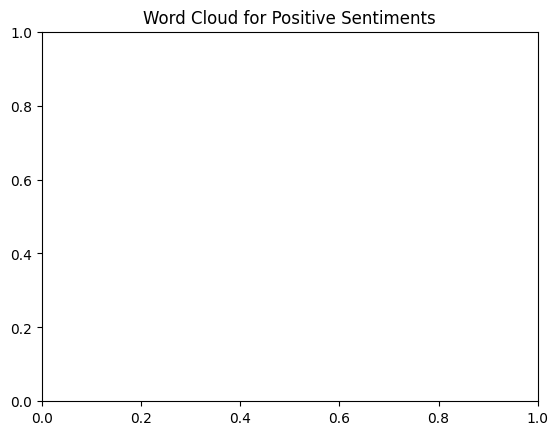

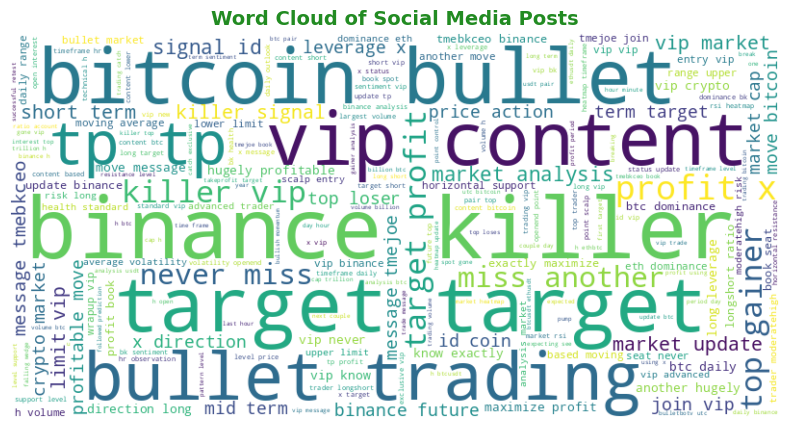

Positive Word Cloud Generated


In [20]:
# Positive Words Cloud
positive_text = df[df['sentiment_type'] == 'POSITIVE']['processed_text'].tolist() # Convert series to list
plt.title('Word Cloud for Positive Sentiments')
if generate_word_cloud(positive_text):
    print("Positive Word Cloud Generated")
else:
    print("No positive sentiment data available.")

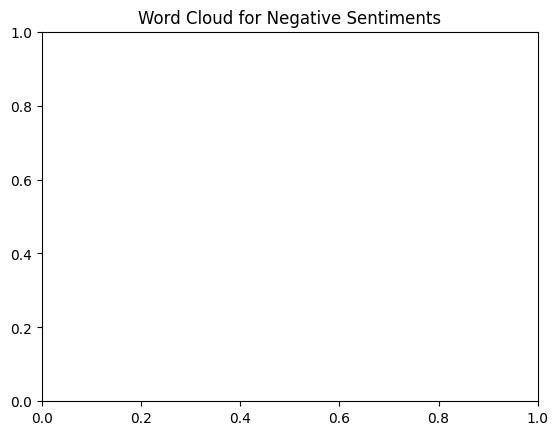

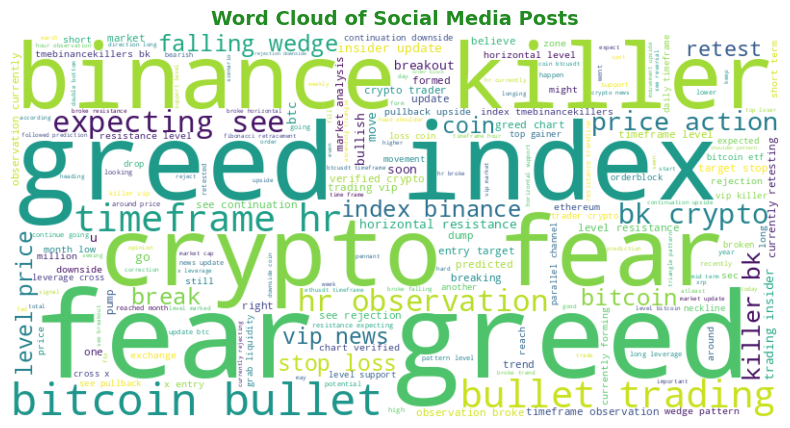

Negative Word Cloud Generated


In [21]:
# # Negative Words Word Cloud
negative_text = df[df['sentiment_type'] == 'NEGATIVE']['processed_text'].tolist() # Convert series to list
plt.title('Word Cloud for Negative Sentiments')
if generate_word_cloud(negative_text):
    print("Negative Word Cloud Generated")
else:
    print("No negative sentiment data available.")
